<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/Basic_statistics_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing key data exploration and visualisation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data
df = pd.read_csv('Bank_customers_data.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,high_balance,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,True,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,False,40-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,False,30-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,True,40-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,False,30-40


In [ ]:
# Calculate mean, median, and standard deviation
age_mean = df['age'].mean()
age_median = df['age'].median()
age_std = df['age'].std()
print(f"Mean Age: {age_mean}, Median Age: {age_median}, Standard Deviation: {age_std}")

Mean Age: 40.78880836792608, Median Age: 39.0, Standard Deviation: 10.200236483529348


In [ ]:
# Calculate the 75th percentile of balances
balance_75th_percentile = df['balance'].quantile(0.75)
print(f"75th Percentile of Balance: {balance_75th_percentile}")

75th Percentile of Balance: 1381.5


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


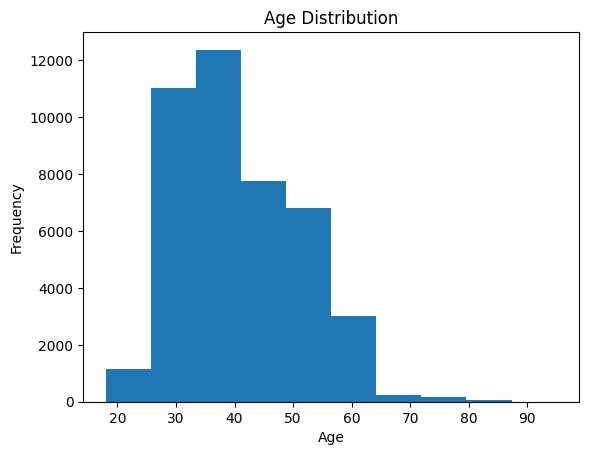

In [ ]:
# Plot histogram
plt.hist(df['age']) # Optionally adjust bin size using bins 'bins = n'
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

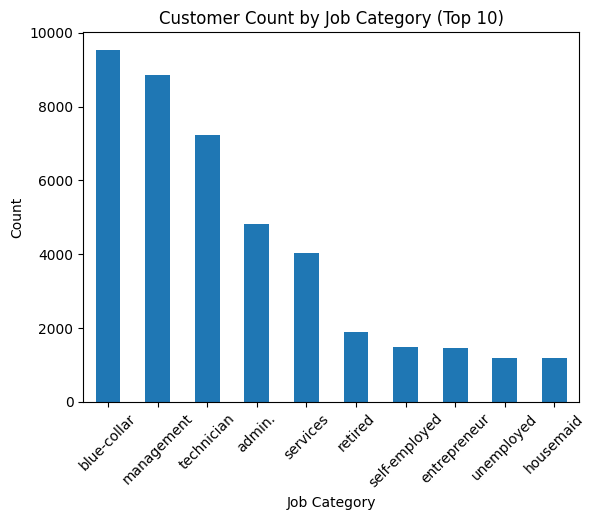

In [ ]:
# Count customers by job
job_counts = df['job'].value_counts()

# Bar chart (top 10)
job_counts.head(10).plot(kind='bar')
plt.title('Customer Count by Job Category (Top 10)')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

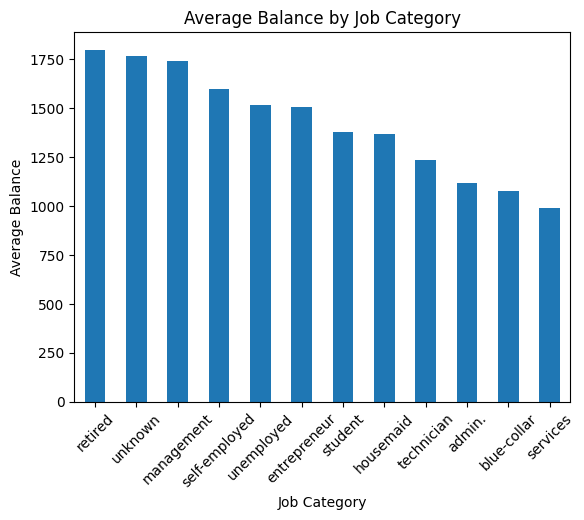

In [ ]:
# Which job categories have the most lucrative customers
# Calculate the average balance by job category
avg_balance_by_job = df.groupby('job')['balance'].mean().sort_values(ascending=False)

# Bar chart for visualization
avg_balance_by_job.plot(kind='bar')
plt.title('Average Balance by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()


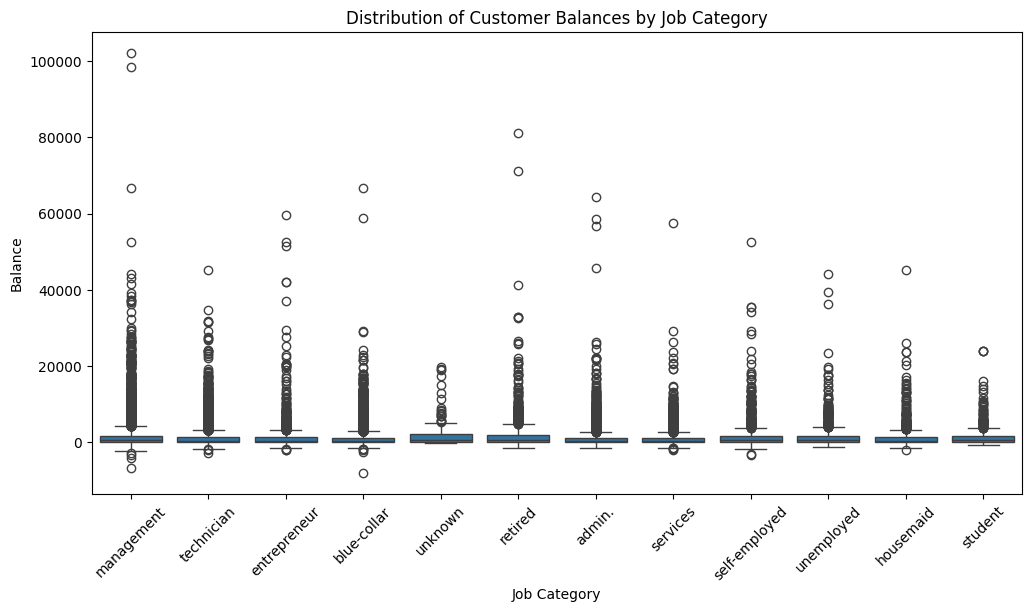

In [ ]:
# Box plot for balances by job category
plt.figure(figsize=(12, 6))
sns.boxplot(x='job', y='balance',data=df)
plt.title('Distribution of Customer Balances by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

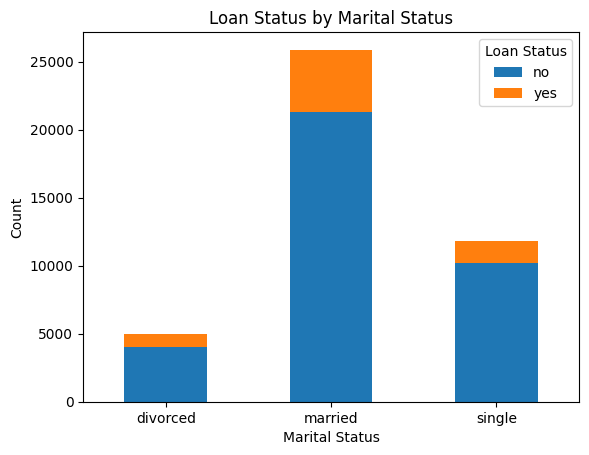

In [ ]:
# Group data by marital status and loan
loan_by_marital = df.groupby(['marital', 'loan']).size().unstack()

# Bar chart
loan_by_marital.plot(kind='bar', stacked=True)
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

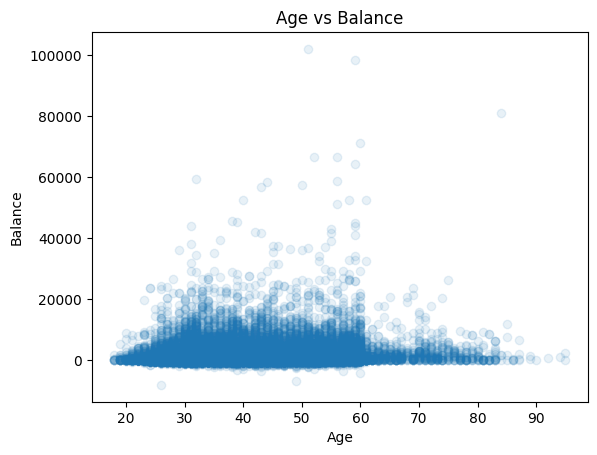

In [ ]:
# Age vs Balance Scatter plot
plt.scatter(df['age'], df['balance'], alpha=0.1)
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

<ipython-input-63-86d2200e9b91>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_age_group = df.groupby('age_group')['balance'].mean()


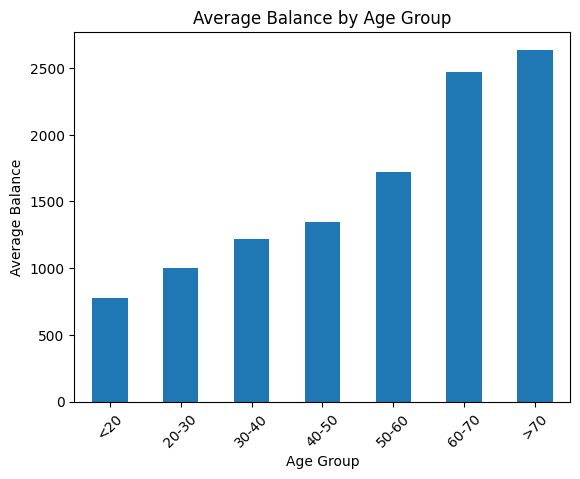

In [ ]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70'])

# Calculate average balance for each age group
avg_balance_by_age_group = df.groupby('age_group')['balance'].mean()

# Bar plot
avg_balance_by_age_group.plot(kind='bar')
plt.title('Average Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()

75th Percentile of Balance: 1381.5


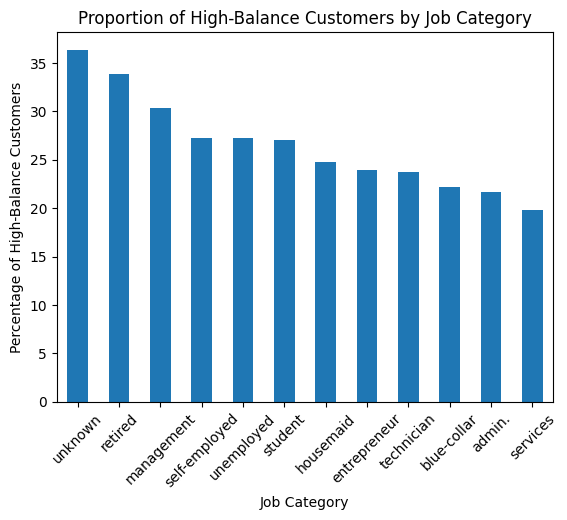

In [ ]:
# Calculate the 75th percentile of balances
balance_75th_percentile = df['balance'].quantile(0.75)
print(f"75th Percentile of Balance: {balance_75th_percentile}")

# Flag customers with high balances
df['high_balance'] = df['balance'] > balance_75th_percentile

# Calculate the proportion of high-balance customers for each job category
high_balance_by_job = df.groupby('job')['high_balance'].mean() * 100

# Bar chart
high_balance_by_job.sort_values(ascending=False).plot(kind='bar')
plt.title('Proportion of High-Balance Customers by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Percentage of High-Balance Customers')
plt.xticks(rotation=45)
plt.show()
